# **FB-31 Vasalatii Anton, Task 3** 
___
## ***Dataset*** 
**Source**: Chen, S. (2015). Beijing PM2.5 [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5JS49.

**General**: This hourly data set contains the PM2.5 data of US Embassy in Beijing. Meanwhile, meteorological data from Beijing Capital International Airport are also included.  

**Subject Area**: Climate and Environment  

**Associated Tasks**:  Regression

**Dataset Characteristics**: Multivariate, Time-Series  

**Instances**: 43824  

**Columns count**: 13 

**Missing values**: Yes  

**Additional info**: The data's time period is between Jan 1st, 2010 to Dec 31st, 2014. Missing data are denoted as "NA".
___
### **Variables info**
**No**: row number

**year**: year of data in this row

**month**: month of data in this row

**day**: day of data in this row

**hour**: hour of data in this row

**pm2.5**: PM2.5 concentration

**DEWP**: Dew Point

**TEMP**: Temperature

**PRES**: Pressure

**cbwd**: Combined wind direction

**Iws**: Cumulated wind speed  

**Is**: Cumulated hours of snow

**Ir**: Cumulated hours of rain  
___

**Setup imports**

In [43]:
from colorama import Fore, Style
import pandas as pd
import tabulate
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay

**Additional functions that use python-tabulate and colorama to make output beautiful** 

In [44]:
def print_df(frame):
    print(Fore.LIGHTCYAN_EX + tabulate.tabulate(frame, headers='keys', tablefmt="heavy_grid", showindex=False) + Style.RESET_ALL)

In [45]:
def print_delimiter():
    print(Fore.LIGHTMAGENTA_EX+"_"*135+"\n"+Style.RESET_ALL)

In [46]:
def print_double_delimiter():
    print(Fore.LIGHTYELLOW_EX+"_"*135+"\n"+"_"*135+Style.RESET_ALL)

In [47]:
def print_green_cyan_colored_pair(tag, value, indentation=''):
    print(indentation + Fore.LIGHTGREEN_EX + tag + " " + Fore.CYAN + str(value) + Style.RESET_ALL)

**Parsing data with Pandas**  
Here we read cleaned, normalized and divided into clusters data from previous task

In [48]:
headers = ['No', 'Year', 'Month', 'Day', 'Hour', 'PM2.5', 'DEWP', 'TEMP', 'PRES', 'CBWD', 'IWS','IS','IR','PM2.5_Orig','TEMP_Orig','KMeansCluster', 'AgglomerativeCluster']
df = pd.read_csv("beijing_pm_2_5_cleared_clustered.csv",delimiter=",",index_col=False, header=1, na_values=['NA'], names=headers)
print_df(df.head())

┏━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃   No ┃   Year ┃   Month ┃   Day ┃   Hour ┃    PM2.5 ┃   DEWP ┃     TEMP ┃   PRES ┃ CBWD   ┃   IWS ┃   IS ┃   IR ┃   PM2.5_Orig ┃   TEMP_Orig ┃   KMeansCluster ┃   AgglomerativeCluster ┃
┣━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━╋━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━╋━━━━━━╋━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━┫
┃   27 ┃   2010 ┃       1 ┃     2 ┃      2 ┃ 0.244992 ┃    -11 ┃ 0.229508 ┃   1021 ┃ SE     ┃  3.57 ┃    0 ┃    0 ┃          159 ┃          -5 ┃               0 ┃                      1 ┃
┣━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━╋━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━╋━━━━━━╋━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━┫
┃   28 ┃   2010 ┃       1 ┃     2 ┃      3 ┃ 0.278891 ┃     

**Choosing data from 2 biggest clusters**

In [49]:
df_counts = df['KMeansCluster'].value_counts().reset_index()
print_df(df_counts)

┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃   KMeansCluster ┃   count ┃
┣━━━━━━━━━━━━━━━━━╋━━━━━━━━━┫
┃               1 ┃   21094 ┃
┣━━━━━━━━━━━━━━━━━╋━━━━━━━━━┫
┃               0 ┃   15430 ┃
┣━━━━━━━━━━━━━━━━━╋━━━━━━━━━┫
┃               2 ┃    5207 ┃
┗━━━━━━━━━━━━━━━━━┻━━━━━━━━━┛


In [50]:
df = df[(df['KMeansCluster'].isin([1,0]))]
print_df(df.head())

┏━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃   No ┃   Year ┃   Month ┃   Day ┃   Hour ┃    PM2.5 ┃   DEWP ┃     TEMP ┃   PRES ┃ CBWD   ┃   IWS ┃   IS ┃   IR ┃   PM2.5_Orig ┃   TEMP_Orig ┃   KMeansCluster ┃   AgglomerativeCluster ┃
┣━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━╋━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━╋━━━━━━╋━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━┫
┃   27 ┃   2010 ┃       1 ┃     2 ┃      2 ┃ 0.244992 ┃    -11 ┃ 0.229508 ┃   1021 ┃ SE     ┃  3.57 ┃    0 ┃    0 ┃          159 ┃          -5 ┃               0 ┃                      1 ┃
┣━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━╋━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━╋━━━━━━╋━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━┫
┃   29 ┃   2010 ┃       1 ┃     2 ┃      4 ┃ 0.212635 ┃     

### **Classification usign Support Vectors Machine method**

**Splitting dataset into two parts (70% for training, 30% for testing)**

In [58]:
x = df[['PM2.5_Orig','TEMP_Orig']]
y = df['KMeansCluster']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

**Scaling data for training and testing**

In [52]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

**Creating SVC object with specifying linear kernel and fitting the model**  
  
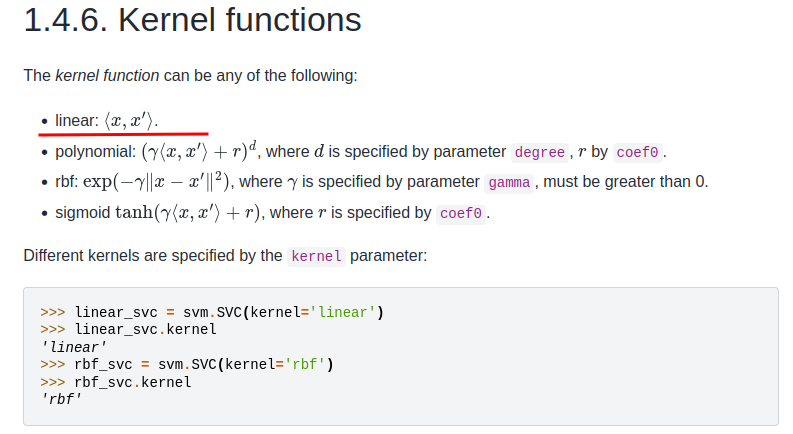

In [ ]:
model = svm.SVC(kernel='linear')
model.fit(x_train_scaled, y_train)

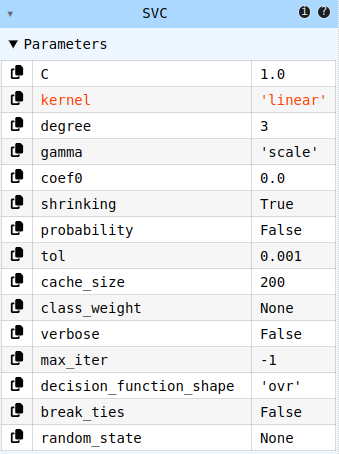

**Prediciting and checking accuracy**

In [54]:
y_pred = model.predict(x_test_scaled)
print_green_cyan_colored_pair("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.999269939770031


**SVC Decision Boundary**

With creating meshgrid manually as described in:  
https://www.geeksforgeeks.org/machine-learning/classifying-data-using-support-vector-machinessvms-in-python/

In [55]:
h = 0.02

x_min, x_max = x_train.iloc[:, 0].min() - 1, x_train.iloc[:, 0].max() + 1
y_min, y_max = x_train.iloc[:, 1].min() - 1, x_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_points_df = pd.DataFrame(mesh_points, columns=x_train.columns)
Z = model.predict(scaler.transform(mesh_points_df))
Z = Z.reshape(xx.shape)

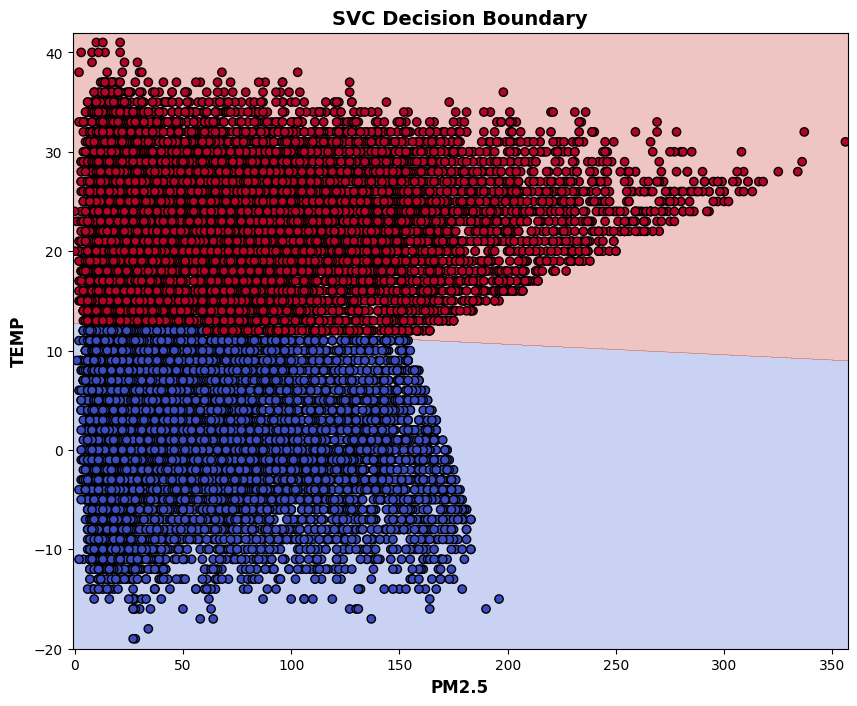

In [56]:
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('PM2.5', fontweight="bold", fontsize=12)
plt.ylabel('TEMP', fontweight="bold", fontsize=12)
plt.title('SVC Decision Boundary', fontweight="bold", fontsize=14)
plt.show()

Scaled SVC desicion boundary using DecisionBoundaryDisplay from skitit-learn:  
https://scikit-learn.org/1.7/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py

Text(0.5, 1.0, ' SVC Decision Boundary')

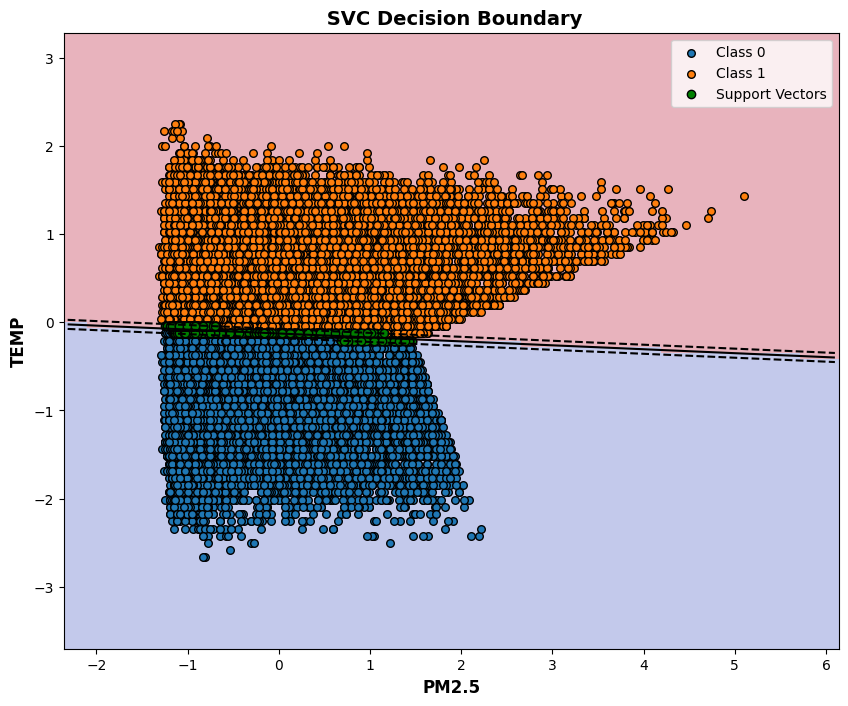

In [ ]:
_, ax = plt.subplots(figsize=(10, 8))

common_params = {"estimator": model, "X": x_train_scaled, "ax": ax}
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="predict",
    plot_method="pcolormesh",
    alpha=0.3,
    cmap=plt.cm.coolwarm
)
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="decision_function",
    plot_method="contour",
    levels=[-1, 0, 1],
    colors=["k", "k", "k"],
    linestyles=["--", "-", "--"],
)

for cls in np.unique(y_train):
    ax.scatter(
        x_train_scaled[y_train == cls, 0],
        x_train_scaled[y_train == cls, 1],
        s=30,
        edgecolors="k",
        label=f"Class {cls}"
    )
ax.scatter(
    model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    facecolors="green",
    edgecolors="k",
    s=50,
    label="Support Vectors"
)
ax.legend()
ax.set_xlabel('PM2.5', fontweight="bold", fontsize=12)
ax.set_ylabel('TEMP', fontweight="bold", fontsize=12)
ax.set_title(f" SVC Decision Boundary", fontweight="bold", fontsize=14)